Данные успешно загружены. Размер датафрейма: (200, 102)

Среднеквадратичная ошибка: 5.56
R-квадрат: -0.25


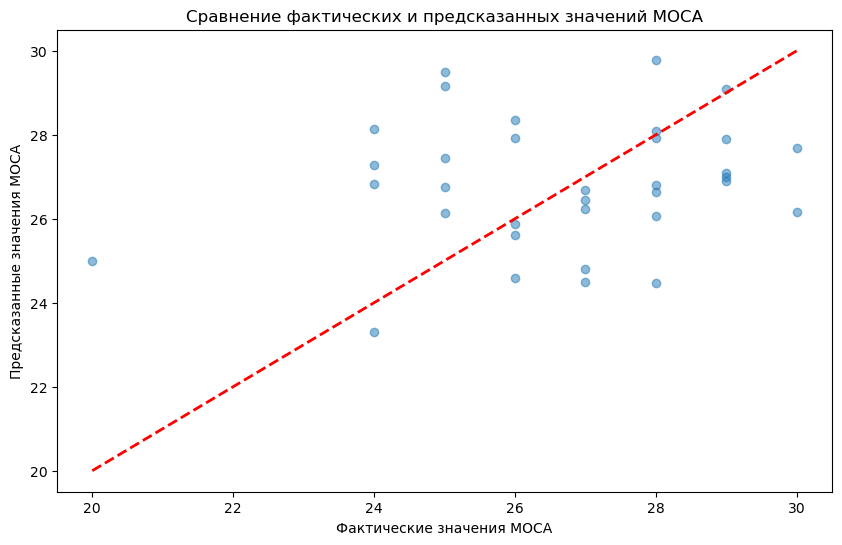


Ранжирование признаков по важности:


Feature  Coefficient
2                            mBKS     3.529291
6                  mActive BKS 50    -3.201513
10                  First SENS PD    -0.685633
5          Percent Time Immobile     -0.603175
8   percent time in bradykinesia     -0.491937
0                   First UPDRS 3    -0.473306
7           Percent Time Inactive    -0.255393
4             Percent Time Tremor     0.187925
3                            mDKS    -0.170893
9     percent time in dyskinesia     -0.112419
1                       First H&Y    -0.072804

                            OLS Regression Results                            
Dep. Variable:             Final MOCA   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     3.867
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           8.70e-05
Time:                        11:24:11   Log-Likelihood:                -293.73
No. Observations:                 132   AIC:                             611.5
Df Residuals:                     120   BIC:                             646.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Функция для преобразования строк в числа
def convert_to_float(x):
    if isinstance(x, str):
        try:
            return float(x.replace(',', '.'))
        except ValueError:
            return np.nan
    return x

# Загрузка данных
file_path = "/Users/andrej/Documents/НУГ/Дата для НУГ/A blinded controlled trial.csv"
data = pd.read_csv(file_path, sep=';')
print(f"Данные успешно загружены. Размер датафрейма: {data.shape}")

# Подготовка данных
data = data.replace('.', np.nan)  # Заменяем точки на NaN

# Выбор признаков для регрессии (группа 1 - моторные тесты)
features = ['First UPDRS 3', 'First H&Y', 'mBKS', 'mDKS', 'Percent Time Tremor', 
            'Percent Time Immobile ', 'mActive BKS 50', 'Percent Time Inactive',
            'percent time in bradykinesia ', 'percent time in dyskinesia ', 'First SENS PD']

# Целевая переменная
target = 'Final MOCA'

# Преобразование данных
for feature in features + [target]:
    data[feature] = data[feature].apply(convert_to_float)

# Удаление строк с NaN значениями
data_clean = data.dropna(subset=features + [target])

X = data_clean[features]
y = data_clean[target]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Построение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test_scaled)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nСреднеквадратичная ошибка: {mse:.2f}")
print(f"R-квадрат: {r2:.2f}")

# Визуализация предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Фактические значения MOCA")
plt.ylabel("Предсказанные значения MOCA")
plt.title("Сравнение фактических и предсказанных значений MOCA")
plt.show()

# Анализ коэффициентов
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values('Coefficient', key=abs, ascending=False)
print("\nРанжирование признаков по важности:")
display(coefficients)

# Построение модели с использованием statsmodels для получения p-значений
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

# Остаточный анализ
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков")
plt.show()

Данные успешно загружены. Размер датафрейма: (200, 102)

Среднеквадратичная ошибка: 159.58
R-квадрат: 0.20


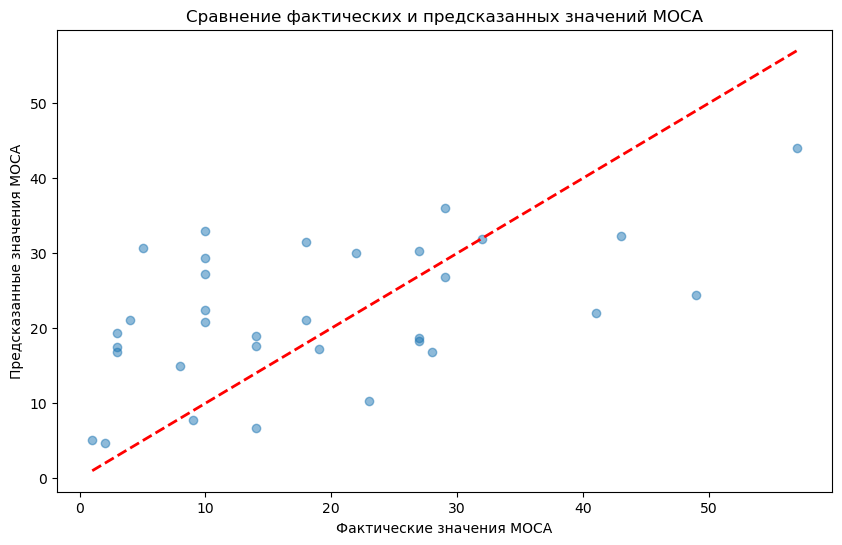


Ранжирование признаков по важности:


Feature  Coefficient
10                  First SENS PD     6.701031
2                            mBKS     4.171387
0                   First UPDRS 3     3.566259
1                       First H&Y     3.205199
6                  mActive BKS 50    -2.818450
7           Percent Time Inactive     2.068522
8   percent time in bradykinesia     -1.650911
9     percent time in dyskinesia      1.619178
4             Percent Time Tremor    -1.546629
3                            mDKS    -1.203682
5          Percent Time Immobile     -0.986514

                            OLS Regression Results                            
Dep. Variable:           Final PDQ 39   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     6.751
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.02e-08
Time:                        11:38:57   Log-Likelihood:                -533.14
No. Observations:                 131   AIC:                             1090.
Df Residuals:                     119   BIC:                             1125.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Функция для преобразования строк в числа
def convert_to_float(x):
    if isinstance(x, str):
        try:
            return float(x.replace(',', '.'))
        except ValueError:
            return np.nan
    return x

# Загрузка данных
file_path = "/Users/andrej/Documents/НУГ/Дата для НУГ/A blinded controlled trial.csv"
data = pd.read_csv(file_path, sep=';')
print(f"Данные успешно загружены. Размер датафрейма: {data.shape}")

# Подготовка данных
data = data.replace('.', np.nan)  # Заменяем точки на NaN

# Выбор признаков для регрессии (группа 1 - моторные тесты)
features = ['First UPDRS 3', 'First H&Y', 'mBKS', 'mDKS', 'Percent Time Tremor', 
            'Percent Time Immobile ', 'mActive BKS 50', 'Percent Time Inactive',
            'percent time in bradykinesia ', 'percent time in dyskinesia ', 'First SENS PD']

# Целевая переменная
target = 'Final PDQ 39'

# Преобразование данных
for feature in features + [target]:
    data[feature] = data[feature].apply(convert_to_float)

# Удаление строк с NaN значениями
data_clean = data.dropna(subset=features + [target])

X = data_clean[features]
y = data_clean[target]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Построение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test_scaled)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nСреднеквадратичная ошибка: {mse:.2f}")
print(f"R-квадрат: {r2:.2f}")

# Визуализация предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Фактические значения MOCA")
plt.ylabel("Предсказанные значения MOCA")
plt.title("Сравнение фактических и предсказанных значений MOCA")
plt.show()

# Анализ коэффициентов
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values('Coefficient', key=abs, ascending=False)
print("\nРанжирование признаков по важности:")
display(coefficients)

# Построение модели с использованием statsmodels для получения p-значений
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

# Остаточный анализ
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков")
plt.show()

Данные успешно загружены. Размер датафрейма: (200, 102)

Среднеквадратичная ошибка: 14.07
R-квадрат: 0.37



Ранжирование признаков по важности:


Feature  Coefficient
10                  First SENS PD     3.294597
2                            mBKS    -2.989992
6                  mActive BKS 50     2.954534
7           Percent Time Inactive     1.639454
3                            mDKS     1.434192
9     percent time in dyskinesia     -1.265944
1                       First H&Y    -0.674320
5          Percent Time Immobile      0.572677
0                   First UPDRS 3     0.490739
4             Percent Time Tremor    -0.366634
8   percent time in bradykinesia     -0.160508

                            OLS Regression Results                            
Dep. Variable:          Final UPDRS 1   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     9.887
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.48e-12
Time:                        11:41:49   Log-Likelihood:                -357.85
No. Observations:                 131   AIC:                             739.7
Df Residuals:                     119   BIC:                             774.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

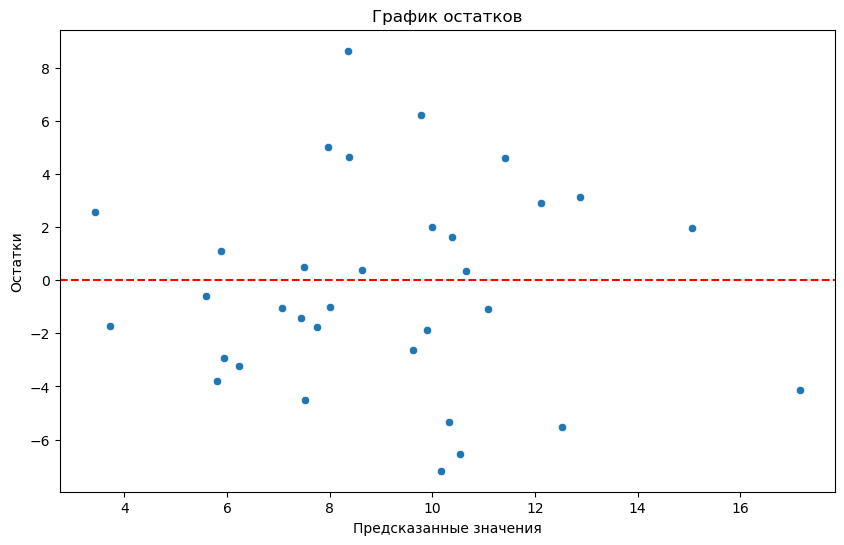

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Функция для преобразования строк в числа
def convert_to_float(x):
    if isinstance(x, str):
        try:
            return float(x.replace(',', '.'))
        except ValueError:
            return np.nan
    return x

# Загрузка данных
file_path = "/Users/andrej/Documents/НУГ/Дата для НУГ/A blinded controlled trial.csv"
data = pd.read_csv(file_path, sep=';')
print(f"Данные успешно загружены. Размер датафрейма: {data.shape}")

# Подготовка данных
data = data.replace('.', np.nan)  # Заменяем точки на NaN

# Выбор признаков для регрессии (группа 1 - моторные тесты)
features = ['First UPDRS 3', 'First H&Y', 'mBKS', 'mDKS', 'Percent Time Tremor', 
            'Percent Time Immobile ', 'mActive BKS 50', 'Percent Time Inactive',
            'percent time in bradykinesia ', 'percent time in dyskinesia ', 'First SENS PD']

# Целевая переменная
target = 'Final UPDRS 1'

# Преобразование данных
for feature in features + [target]:
    data[feature] = data[feature].apply(convert_to_float)

# Удаление строк с NaN значениями
data_clean = data.dropna(subset=features + [target])

X = data_clean[features]
y = data_clean[target]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Построение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test_scaled)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nСреднеквадратичная ошибка: {mse:.2f}")
print(f"R-квадрат: {r2:.2f}")

# Визуализация предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Фактические значения MOCA")
plt.ylabel("Предсказанные значения MOCA")
plt.title("Сравнение фактических и предсказанных значений MOCA")
plt.show()

# Анализ коэффициентов
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values('Coefficient', key=abs, ascending=False)
print("\nРанжирование признаков по важности:")
display(coefficients)

# Построение модели с использованием statsmodels для получения p-значений
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

# Остаточный анализ
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков")
plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Функция для преобразования строк в числа
def convert_to_float(x):
    if isinstance(x, str):
        try:
            return float(x.replace(',', '.'))
        except ValueError:
            return np.nan
    return x

# Загрузка данных
file_path = "/Users/andrej/Documents/НУГ/Дата для НУГ/A blinded controlled trial.csv"
data = pd.read_csv(file_path, sep=';')
print(f"Данные успешно загружены. Размер датафрейма: {data.shape}")

# Подготовка данных
data = data.replace('.', np.nan)  # Заменяем точки на NaN

# Выбор признаков для регрессии (группа 1 - моторные тесты)
features = ['First UPDRS 3', 'First H&Y', 'mBKS', 'mDKS', 'Percent Time Tremor', 
            'Percent Time Immobile ', 'mActive BKS 50', 'Percent Time Inactive',
            'percent time in bradykinesia ', 'percent time in dyskinesia ', 'First SENS PD']

# Целевая переменная
target = 'Final NMS'

# Преобразование данных
for feature in features + [target]:
    data[feature] = data[feature].apply(convert_to_float)

# Удаление строк с NaN значениями
data_clean = data.dropna(subset=features + [target])

X = data_clean[features]
y = data_clean[target]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Построение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test_scaled)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nСреднеквадратичная ошибка: {mse:.2f}")
print(f"R-квадрат: {r2:.2f}")

# Визуализация предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Фактические значения MOCA")
plt.ylabel("Предсказанные значения MOCA")
plt.title("Сравнение фактических и предсказанных значений MOCA")
plt.show()

# Анализ коэффициентов
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values('Coefficient', key=abs, ascending=False)
print("\nРанжирование признаков по важности:")
display(coefficients)

# Построение модели с использованием statsmodels для получения p-значений
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

# Остаточный анализ
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков")
plt.show()

Данные успешно загружены. Размер датафрейма: (200, 102)

Среднеквадратичная ошибка: 20.33
R-квадрат: 0.32



Ранжирование признаков по важности:


Feature  Coefficient
6                  mActive BKS 50     3.696737
3                            mDKS     2.931808
10                  First SENS PD     2.841749
9     percent time in dyskinesia     -2.588385
2                            mBKS    -2.247218
8   percent time in bradykinesia     -1.553250
7           Percent Time Inactive     1.445954
1                       First H&Y    -1.164375
0                   First UPDRS 3     0.791900
5          Percent Time Immobile     -0.213340
4             Percent Time Tremor     0.174422

                            OLS Regression Results                            
Dep. Variable:              Final NMS   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     7.297
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           2.02e-09
Time:                        11:47:52   Log-Likelihood:                -359.24
No. Observations:                 131   AIC:                             742.5
Df Residuals:                     119   BIC:                             777.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         